# CS 4662: ADVANCED MACHINE LEARNING
## Jay Tandel

### Problem2: Face Recognition Using SVM and PCA:

## a)

Download the dataset “Face” from this link:  https://drive.google.com/drive/folders/14Mi1I91iVQ13PG0SPjh9wN5NSNlBb3rb?usp=sharing (Links to an external site.)

Check out the dataset. This is an image dataset from AT&T research lab. It includes 400 faces (64x64 pixels) from 40 people (10 images per person).

You have to also download the csv file that includes the labels of the images (the label is person’s ID. The file is in the same folder). The goal is to build a Face Recognition algorithm to recognize each person using PCA dim-reduction and a non-linear SVM.

you can use:

mpimg.imread(file_name)   to load an image, and

plt.imshow(image_name, cmap=plt.cm.gray)  to show an image (This is a little different from what we had before!). Add   %matplotlib inline   at top of your code to make sure that the images will be shown inside the Jupyter explorer page.

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import preprocessing 
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

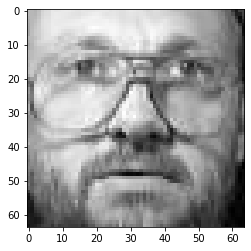

In [21]:
%matplotlib inline

im1 = plt.imread('/Users/jaytandel/Face/0.jpg') 

imgplot = plt.imshow(im1,cmap=plt.cm.gray)
plt.show()


## b)
Build the feature matrix and label vector: Each image is considered as a data sample with pixels as features. Thus, to build the feature table you have to convert each 64x64 image into a row of the feature matrix with 4096 columns (i.e 4096 features for 4096 pixels).

In [22]:
df = pd.read_csv('/Users/jaytandel/Face/label.csv')

picname=[]
for row in df['Label']: # each row is a list
        picname.append(row)
        
#len(picname)

test=plt.imread('/Users/jaytandel/Face/0.jpg') 
imgArr = np.asarray(test).reshape(-1) # Thsi line convert "img" marix as 1-d array
imgArr.shape

(4096,)

In [23]:
data = np.zeros((400, 64))
imgi='';
X = np.zeros((400,4096))
#featureMat=[[]]
feature=[]
for i in range(len(picname)):
    imgname = str(i) + '.jpg'
    imgi = plt.imread('/Users/jaytandel/Face/'+ imgname) 
    #imgplot = plt.imshow(imgi,cmap=plt.cm.gray)
    imgArr = np.asarray(imgi).reshape(-1) # Thsi line convert "img" marix as 1-d array

     # Create an empty list
    
    feature.append(imgArr) # Now append ImgArr in list
    
    featureMat = np.asmatrix(feature) # Convert list into Matrix

In [24]:
feature

[array([186, 183, 179, ...,   9,   3,   5], dtype=uint8),
 array([204, 198, 194, ..., 120, 164, 167], dtype=uint8),
 array([ 86,  79,  82, ..., 189, 185, 141], dtype=uint8),
 array([ 61,  90,  98, ..., 145,  58,  18], dtype=uint8),
 array([ 99, 134, 165, ..., 103,  92, 117], dtype=uint8),
 array([44, 58, 92, ..., 57, 52, 67], dtype=uint8),
 array([120, 168, 184, ...,  53,  56,  54], dtype=uint8),
 array([111, 126, 161, ...,  40,  44,  50], dtype=uint8),
 array([158, 162, 168, ...,  98,  84,  70], dtype=uint8),
 array([26, 46, 69, ..., 82, 46, 38], dtype=uint8),
 array([  8,  56,  33, ..., 124, 133,  72], dtype=uint8),
 array([119, 168, 165, ...,  15,   0,   3], dtype=uint8),
 array([189, 204, 207, ...,  12,  20,  18], dtype=uint8),
 array([ 74,  82,  78, ..., 152, 154, 156], dtype=uint8),
 array([171, 172, 174, ...,   9,  17,  10], dtype=uint8),
 array([ 93, 114, 125, ..., 247, 229, 205], dtype=uint8),
 array([ 90,  37,  36, ..., 113, 113, 112], dtype=uint8),
 array([188, 177, 172, ...

In [25]:
featureMat = np.asmatrix(feature)

In [26]:
featureMat

matrix([[186, 183, 179, ...,   9,   3,   5],
        [204, 198, 194, ..., 120, 164, 167],
        [ 86,  79,  82, ..., 189, 185, 141],
        ...,
        [163, 177, 193, ...,  44,  48,  53],
        [145, 147, 151, ..., 132, 114, 117],
        [ 91,  74,  66, ...,  75,  44,  46]], dtype=uint8)

## c)
Normalize each column of your feature matrix using preprocessing.scale (This step is very important!).



In [28]:
featureMatNew = preprocessing.scale(featureMat, axis=0, with_mean=True, with_std=True, copy=True)
print(featureMatNew)

[[ 1.37649641  1.11885303  0.79610373 ... -1.17094622 -1.24726506
  -1.21711982]
 [ 1.68113398  1.3654141   1.03570156 ...  0.68710075  1.48558299
   1.58234648]
 [-0.31593455 -0.59063704 -0.75329558 ...  1.84210291  1.84204144
   1.13304942]
 ...
 [ 0.98723729  1.02022861  1.01972837 ... -0.58507555 -0.48342554
  -0.38764832]
 [ 0.68259971  0.52710647  0.34885444 ...  0.88797069  0.63687242
   0.71831368]
 [-0.231313   -0.67282406 -1.0088666  ... -0.06616154 -0.55132239
  -0.50861291]]


## d)
Use sklearn functions to split the normalized dataset into testing and training sets with the following parameters: test_size=0.25, random_state=5.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(featureMatNew, picname, test_size=0.25, random_state=5)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[ 0.25949198 -0.04820269 -0.36993905 ... -0.93659795 -0.87383241
  -0.38764832]
 [-1.68680362 -1.37963246 -0.25812673 ... -0.0829007  -0.02512183
  -0.00747388]
 [ 0.07332457  0.49423166  0.84402329 ... -0.6520322  -0.5682966
  -0.54317422]
 ...
 [ 0.98723729  0.83941716  0.54053271 ... -0.41768394 -0.61921924
  -0.61229685]
 [-1.39909036 -1.21525841 -1.05678617 ...  1.60775465  1.33281509
   0.26901661]
 [ 1.07185883  1.26678968  1.22737983 ... -0.66877136 -0.53434818
  -0.52589357]]
[[-1.38216605 -1.5440065  -1.47208908 ...  2.2438428   2.28337094
   2.18716945]
 [-1.55140914 -1.65906834 -1.79155285 ...  1.47384135  2.26639672
   2.01436289]
 [-0.60364781  0.08329655  0.28496169 ... -0.0829007  -0.09301868
   0.19989399]
 ...
 [-0.06206991 -0.37695078  0.38080082 ... -1.32159867 -1.28121349
  -1.19983916]
 [-1.19599864 -0.93582253 -1.21651806 ...  0.4862308   0.55200136
   0.80471696]
 [-0.63749643 -0.32763857 -0.14631441 ...  1.39014554  1.29886667
   1.09848811]]
[17, 22, 19, 18, 

## e)
The dimensionality of the data samples is 4096. Use PCA (Principal Component Analysis) to reduce the dimensionality from 4096 to 50 (i.e. only k=50 principal components!). You should “fit” your PCA on your training set only, and then use this fitted model to “transform” both training and testing sets (When you finish this step, the number of columns in your testing and training sets should be 50). You can use this format:

from  sklearn.decomposition  import  PCA

k = 50  #  k  is the number of components (new features) after dimensionality reduction

my_pca = PCA(n_components = k)

 #X_Train is feature matrix of training set before dimensionality reduction, 

 #X_Train_New is feature matrix of training set after dimensionality reduction:

X_Train_new = my_pca. fit_transform(X_Train)

X_Test_new = my_pca. transform(X_Test)

In [32]:
k = 50 # (k is the number of components (new features) after dimensionality reduction)
my_pca = PCA(n_components = k)
# X_Train is feature matrix of training set before dimensionality reduction,
# X_Train_New is feature matrix of training set after dimensionality reduction:
X_Train_new = my_pca. fit_transform(X_train)
X_Test_new = my_pca. transform(X_test)

## f)
Design and Train a non-linear SVM classifier with “RBF Kernel” to recognize the face based on the training dataset that you built. Use SVC(C=1, kernel='rbf', gamma=0.0005, random_state=1). Then, Test your SVM on testing set, and calculate and report the accuracy. Also, calculate and report the Confusion Matrix using confusion_matrix(y_test, y_predict).

In [41]:
clf = SVC(C=1, kernel='rbf', gamma=0.0005, random_state=1)
clf.fit(X_Train_new, y_train)
y_predict =clf.predict(X_Test_new)
accuracy = accuracy_score(y_test,y_predict)
conf = confusion_matrix(y_test,y_predict)

print("SVM Accuracy: ", +accuracy)

print("Confusion Matrix:")
print(y_predict)

SVM Accuracy:  0.91
Confusion Matrix:
[16 32 39 22 29 38 21 12 23 28  9 13 29 21 10  1 36 11 39 25  8 26 19 12
 35  7 21 20  8 14  7 33 23  0 20  1 38 25  8 23 39  2 10 13 38 25 26 18
  4 36 26 17 13 16 38 36  4 36  5  6 14  9 13  7  9 22  6  6 24  0  4 31
 31 37 14 22 16 34 11 15 15  0  2 25  5 34 11 18 22 11 12  1 16 24 36 33
 32 13 38 20]


## g)
Now, use GridSearchCV to find the best value for parameter C in your SVM. Search in this list: [0.1, 1, 10, 100, 1e3, 5e3, 1e4, 5e4, 1e5].

Important Note: Remember that in part (g), we want to use cross-validation method (GridSearchCV) to find the best C.  Thus, you don’t use the X_train and X_test anymore. You have to perform another PCA: for the sake of simplicity, this time you can do the PCA on the entire dataset after normalization (X_normalized_pca = my_pca.fit_transform(X_normalized)), where X_normalized is the entire dataset after normalization, and then use it in GridSearchCV with 10-fold cross validation to find C.

In [43]:
 #find the best value for parameter C in the list: [0.1, 1, 10, 100, 1e3, 5e3, 1e4, 5e4, 1e5]. 
x = [0.1, 1, 10, 100, 1e3, 5e3, 1e4, 5e4, 1e5]

X_normalized_pca = my_pca.fit_transform(featureMatNew)
param_grid2 = dict(C=x)
grid = GridSearchCV(estimator =clf, param_grid=param_grid2, cv=10, scoring='accuracy')
# fit the grid (start the grid search):
grid.fit(X_normalized_pca,picname)

# view the results:
#print(grid.cv_results_)

# view the best results corresponding to the best structure of clf:
print(grid.best_score_)
print(grid.best_params_)

0.9649999999999999
{'C': 10}


## Answer Summary

## f)
SVM Accuracy:  0.91

Confusion Matrix:

[16 32 39 22 29 38 21 12 23 28  9 13 29 21 10  1 36 11 39 25  8 26 19 12
 35  7 21 20  8 14  7 33 23  0 20  1 38 25  8 23 39  2 10 13 38 25 26 18
  4 36 26 17 13 16 38 36  4 36  5  6 14  9 13  7  9 22  6  6 24  0  4 31
 31 37 14 22 16 34 11 15 15  0  2 25  5 34 11 18 22 11 12  1 16 24 36 33
 32 13 38 20]


## g)
0.9649999999999999

{'C': 10}